In [1]:
#from gng import GrowingNeuralGas
from gwr import GrowingWhenRequired



In [2]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt

In [3]:
    if os.path.exists('visualization/sequence'):
        shutil.rmtree('visualization/sequence')
    os.makedirs('visualization/sequence')
    n_samples = 2000
    dataset_type = 'moons'
    data = None
    print('Preparing data...')


Preparing data...


In [4]:
    if dataset_type == 'blobs':
        data = datasets.make_blobs(n_samples=n_samples, random_state=8)
    elif dataset_type == 'moons':
        data = datasets.make_moons(n_samples=n_samples, noise=.05)
    elif dataset_type == 'circles':
        data = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
    data = StandardScaler().fit_transform(data[0])
    print('Done.')


Done.


In [5]:
print('Creating network...')
#gng = GrowingNeuralGas(data)
features = data.shape[1]
print('Number of input features:', features)
hparams = GrowingWhenRequired.default_hparams()
hparams['input_shape'] = [features]
hparams['max_size'] = 100
hparams['min_size'] = 100
hparams['max_age'] = 20
hparams['growth_interval'] = 1
hparams['growth_strategy'] = 'required'
hparams['activity_threshold'] = 1.1  #0.5 # maybe I can dynamically adjust activity threshold need to plot multiple series over time.
hparams['usage_threshold'] = 0.1
hparams['usage_decay'] = 0.95  # 0.8 default

net = GrowingWhenRequired(hparams)
net.reset()

Creating network...
Number of input features: 2


   Pass #1
i 49


/home/dave/anaconda3/envs/dave19d/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


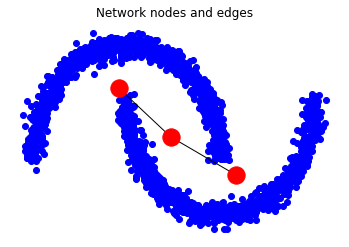

i 99


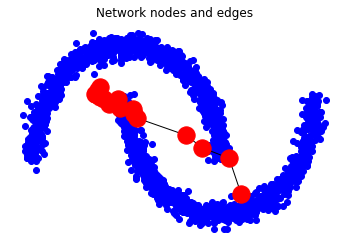

i 149


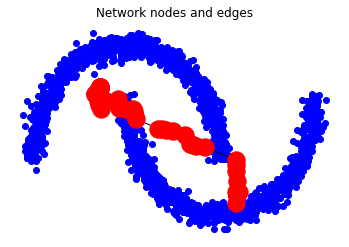

i 199


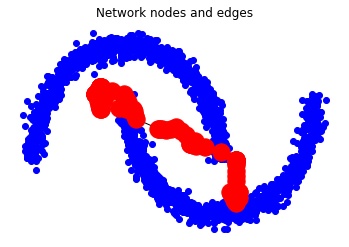

i 249


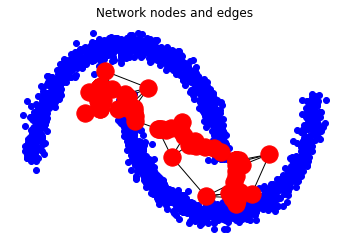

i 299


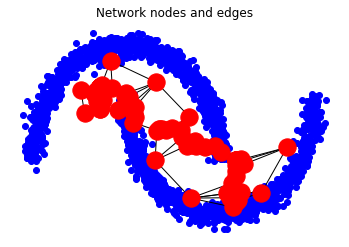

i 349


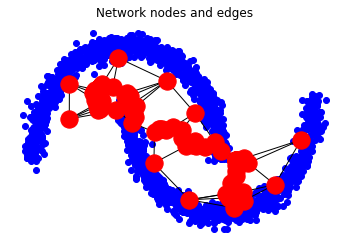

i 399


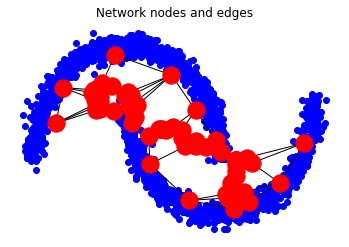

i 449


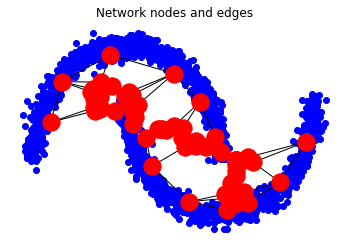

i 499


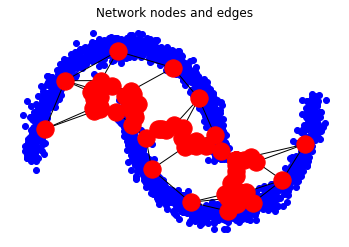

i 549


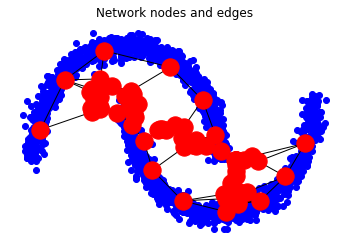

i 599


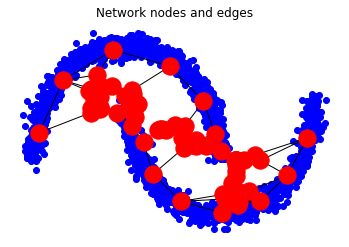

i 649


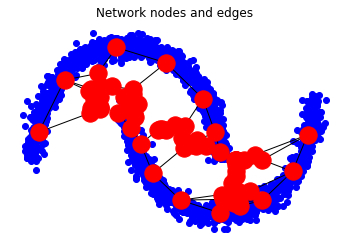

i 699


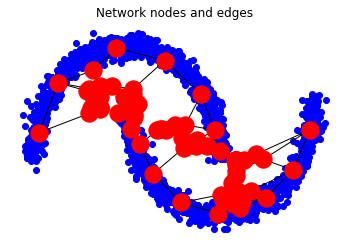

i 749


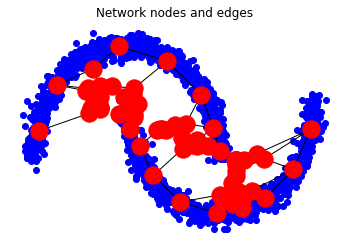

i 799


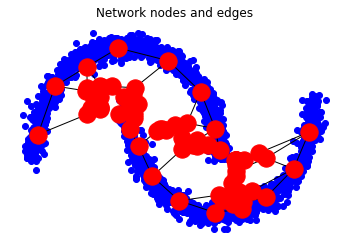

i 849


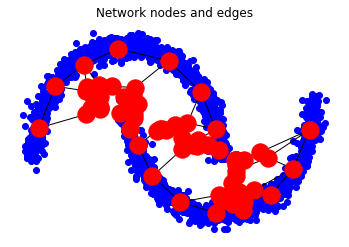

i 899


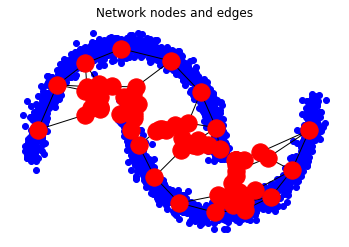

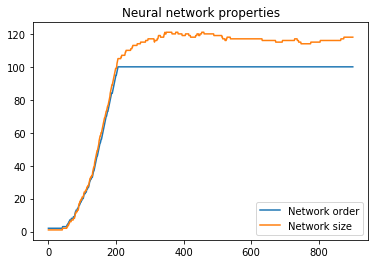

In [6]:
# logging variables
accumulated_local_error = []
global_error = []
network_order = []
network_size = []
total_units = []

# iterate through the data
early_stopping = 900
plot_interval = 50
passes = 1
step = 0
for p in range(passes):
    print('   Pass #%d' % (p + 1))
    np.random.shuffle(data)
    for i, observation in enumerate(data):
        error = net.update(observation, step)
        step += 1
        accumulated_local_error.append(error)

        if plot_interval is not None:
            if step % plot_interval == 0:
                print('i',i)
                # Draw the network
                #self.plot_network(data, 'visualization/sequence/' + str(step) + '.png')
                net.plot_network(data, 'visualization/sequence/' + str(step) + '.png')
                plt.show()

        network_order.append(net.network.order())  # The order of a graph G is the cardinality of its vertex set
        network_size.append(net.network.size())  # The size of a graph G is the cardinality of its vertex set,
        total_units.append(net.units_created)  # Total number created, ever

        if (i > early_stopping) and (early_stopping >= 0):
            break

    global_error.append(net.distance_to_data(data))  # error after one epoch

plt.clf()
plt.title('Accumulated local error')
plt.xlabel('iterations')
plt.plot(range(len(accumulated_local_error)), accumulated_local_error)
plt.savefig('visualization/accumulated_local_error.png')
plt.clf()
plt.title('Global error')
plt.xlabel('passes')
plt.plot(range(len(global_error)), global_error)
plt.savefig('visualization/global_error.png')
plt.clf()
plt.title('Neural network properties')
plt.plot(range(len(network_order)), network_order, label='Network order')
plt.plot(range(len(network_size)), network_size, label='Network size')
plt.legend()
plt.savefig('visualization/network_properties.png')
